# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')
#merged_data = merged_data.drop_duplicates(["Mouse ID", "Timepoint"])


# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mice=merged_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_ID = merged_data[merged_data.duplicated(["Mouse ID","Timepoint"])]
duplicated_mouse_ID = pd.DataFrame({"Mouse ID":duplicated_mouse_ID["Mouse ID"].unique()})
duplicated_mouse_ID


,Mouse ID
0,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data.loc[merged_data["Mouse ID"]==str(duplicated_mouse_ID.iloc[0,0]),:]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

drop_index = merged_data[merged_data["Mouse ID"]==str(duplicated_mouse_ID.iloc[0,0])].index
merged_data_no_duplicated = merged_data.drop(drop_index)
merged_data_no_duplicated.reset_index(inplace=True)


In [6]:
# Checking the number of mice in the clean DataFrame.
pd.DataFrame({"Total Subjects":[len(merged_data_no_duplicated["Mouse ID"].unique())]})

,Total Subjects
0,248


## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_groups = merged_data_no_duplicated.groupby(["Drug Regimen"])

mean = drug_groups["Tumor Volume (mm3)"].mean()

median = drug_groups["Tumor Volume (mm3)"].median()

variance = drug_groups["Tumor Volume (mm3)"].var()

standard_dev = drug_groups["Tumor Volume (mm3)"].std()

SEM = drug_groups["Tumor Volume (mm3)"].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Drug_summary = pd.DataFrame({ 'Mean Tumor Volume':mean, 
                            'Median Tumor Volume': median, 
                            'Variance Tumor Volume': variance, 
                            'Standard Deviation Tumor Volume': standard_dev,
                            'SEM Tumor Volume':SEM
                            })

Drug_summary



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

summary_table = drug_groups['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_df = summary_table.rename(columns={
    'mean':'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard deviation',
    'sem': 'SEM'
})
print('Tumor Volume (mm3)')
summary_agg_df

# Using the aggregation method, produce the same summary statistics in a single line.


Tumor Volume (mm3)


,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

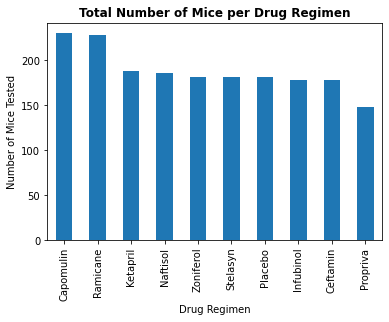

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

no_mice_per_regimen = drug_groups['Mouse ID'].count().sort_values(ascending=False)

bar_mice_per_regimen = no_mice_per_regimen.plot(kind='bar', width=0.5)

bar_mice_per_regimen.set_title(label='Total Number of Mice per Drug Regimen', fontweight = 'bold')
bar_mice_per_regimen.set_xlabel('Drug Regimen')
bar_mice_per_regimen.set_ylabel('Number of Mice Tested')

plt.show()
plt.close()



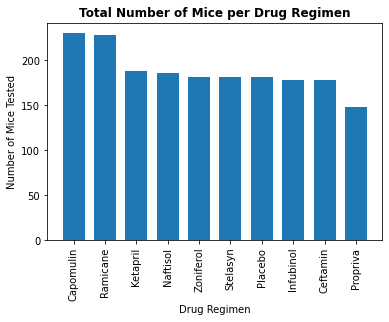

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis_regimen = np.arange(len(no_mice_per_regimen))
regimen_name = list(no_mice_per_regimen.index.values)

py_bar_mice_per_regimen = plt.bar(x_axis_regimen, no_mice_per_regimen, width=0.7)

plt.xticks(x_axis_regimen, regimen_name, rotation='vertical')
plt.title('Total Number of Mice per Drug Regimen', fontweight = 'bold')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

plt.show()
plt.close()


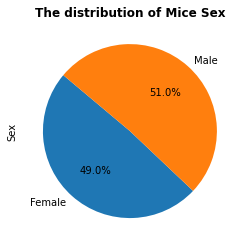

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_mice = merged_data_no_duplicated.groupby('Sex')['Sex'].count()

pd_pie_mice_sex = sex_mice.plot(kind='pie', autopct='%1.1f%%', startangle=140)

pd_pie_mice_sex.set_title(label='The distribution of Mice Sex', fontweight = 'bold')
pd_pie_mice_sex.set_ylabel('Sex')

plt.show()
plt.close()


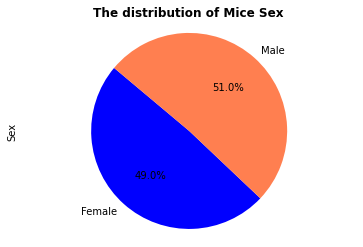

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = sex_mice.index
colors = ['blue','coral']

py_bar_mice_sex = plt.pie(sex_mice, labels=sex_mice.index, autopct="%1.1f%%", colors=colors, startangle=140)

plt.axis("equal")

plt.title('The distribution of Mice Sex', fontweight = 'bold')
plt.ylabel('Sex')

plt.show()
plt.close()


## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_tumor_vol = merged_data_no_duplicated.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
   
    # add subset 
    final_tumor_vol_list.append(final_tumor_vol)
    
   # Calculate the IQR and quantitatively
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]
    
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for Capomulin is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------')

Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Capomulin is: 1
Outlier final tumor volume(mm3) is 36.32
----------------------------------------------------------
Ceftamin Regimen
Final tumor volume(mm3) for Ceftami

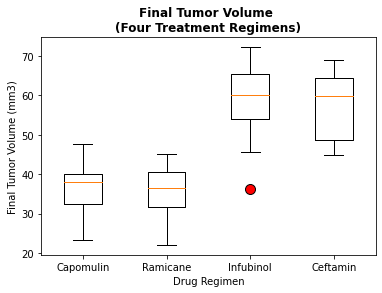

In [44]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})

final_tumor_plot.set_title('Final Tumor Volume \n(Four Treatment Regimens)', fontweight='bold')
final_tumor_plot.set_xlabel('Drug Regimen')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)')

plt.show()
plt.close()

## Line and Scatter Plots

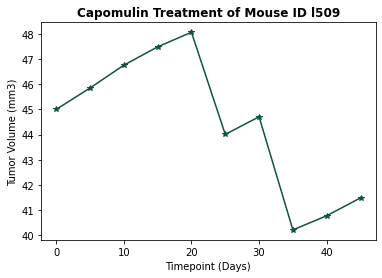

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = merged_data_no_duplicated.loc[merged_data_no_duplicated['Drug Regimen'] == 'Capomulin']

mouse_id = 'l509'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]

time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='*', color='#0B5345')

plt.title(f"Capomulin Treatment of Mouse ID {mouse_id}", fontweight='bold')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()
plt.close()


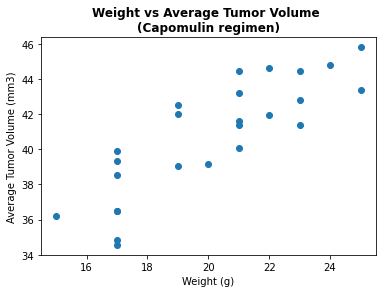

In [51]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_gp = Capomulin_df.groupby('Mouse ID').mean()
mice_weight_avg = Capomulin_gp['Weight (g)']
mice_tumor_avg = Capomulin_gp['Tumor Volume (mm3)']

plt.scatter(mice_weight_avg, mice_tumor_avg)

plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
plt.close()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.71


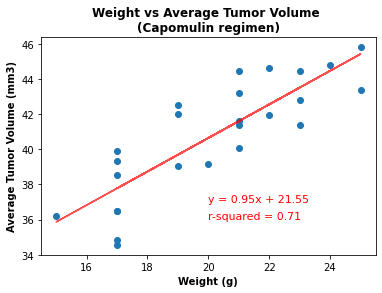

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Define x,y values
x_values = mice_weight_avg
y_values = mice_tumor_avg

# Calculate the correlation
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = round(rvalue**2,2)
print(f"The r-squared is: {r_squared}")

# y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(line_eq,(20,37), fontsize=11, color="red")
plt.annotate(f'r-squared = {r_squared}', (20,36), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Present the box plot chart
plt.show()
plt.close()